<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/Oasis-Infobyte-TASK-2-Credit-Card-Fraud-Detection-Data-DA/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
file_path = '/content/creditcard_2023.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26  

In [ ]:
# Check the dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  f

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Get summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std   

In [ ]:
# Check if 'Amount' and 'Time' columns are present in the dataset
if 'Amount' in df.columns:
    # Standardize 'Amount' column
    scaler = StandardScaler()
    df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
    df.drop(['Amount'], axis=1, inplace=True)  # Drop the original 'Amount' column
else:
    print("Column 'Amount' not found, skipping scaling for 'Amount'.")


In [ ]:
# Check for 'Time' column and handle accordingly
if 'Time' in df.columns:
    # Standardize 'Time' column
    df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
    df.drop(['Time'], axis=1, inplace=True)  # Drop the original 'Time' column
else:
    print("Column 'Time' not found, skipping scaling for 'Time'.")


Column 'Time' not found, skipping scaling for 'Time'.


In [ ]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)  # Replace 'Class' if your target column is named differently
y = df['Class']

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# -------------------- Isolation Forest Model --------------------
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict on the test set
y_pred_test_iso = iso_forest.predict(X_test)

# Convert predictions (-1 = anomaly, 1 = normal) to binary format (0 = anomaly, 1 = normal)
y_pred_test_iso = [1 if x == 1 else 0 for x in y_pred_test_iso]

# Evaluate the Isolation Forest model
print("\nClassification Report for Isolation Forest:")
print(classification_report(y_test, y_pred_test_iso))



Classification Report for Isolation Forest:
              precision    recall  f1-score   support

           0       0.06      0.00      0.00     56750
           1       0.50      0.98      0.66     56976

    accuracy                           0.49    113726
   macro avg       0.28      0.49      0.33    113726
weighted avg       0.28      0.49      0.33    113726



In [ ]:
# -------------------- Logistic Regression Model --------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("\nAccuracy of Logistic Regression:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))



Accuracy of Logistic Regression: 0.5009936162355134

Confusion Matrix for Logistic Regression:
 [[    0 56750]
 [    0 56976]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     56750
           1       0.50      1.00      0.67     56976

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


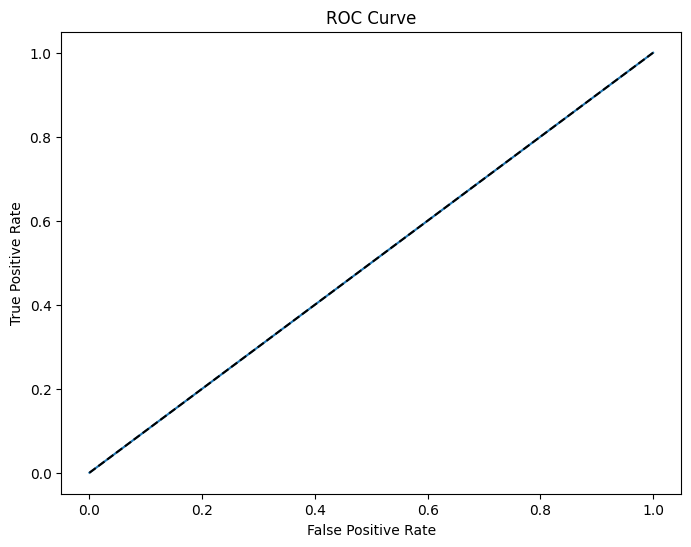

In [ ]:
# -------------------- ROC Curve --------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

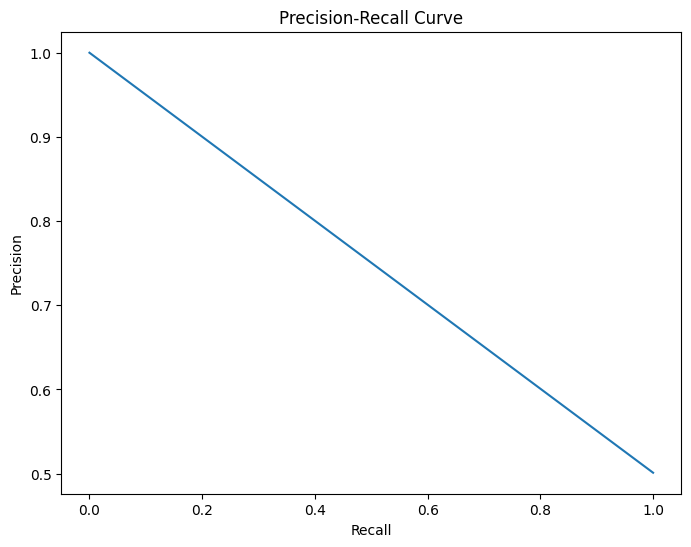

In [ ]:
# -------------------- Precision-Recall Curve --------------------
precision, recall, _ = precision_recall_curve(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

<ipython-input-16-87b278a3ceaf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette="coolwarm")


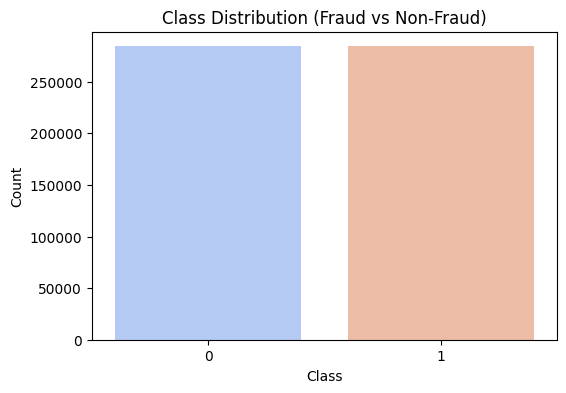

In [ ]:
# -------------------- Class Imbalance Visualization --------------------
# Check for class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette="coolwarm")
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


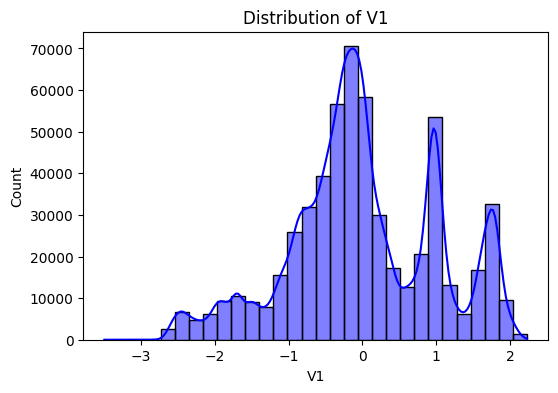

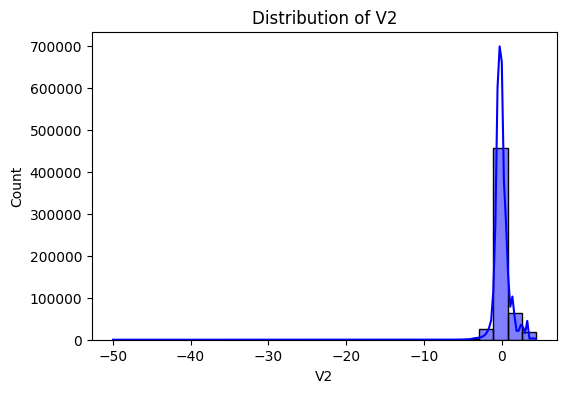

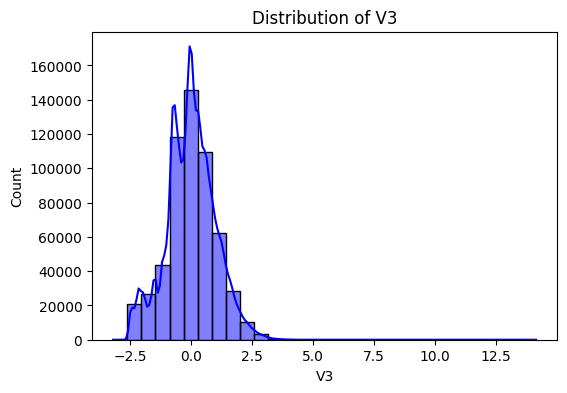

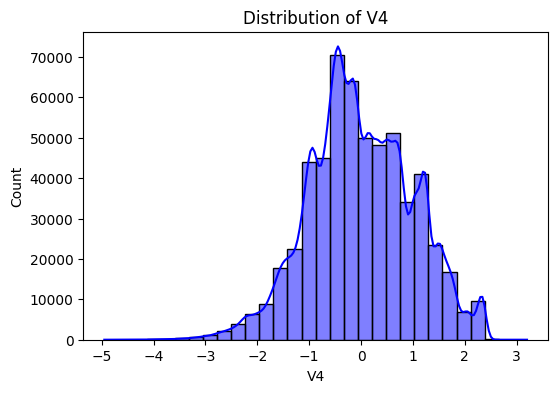

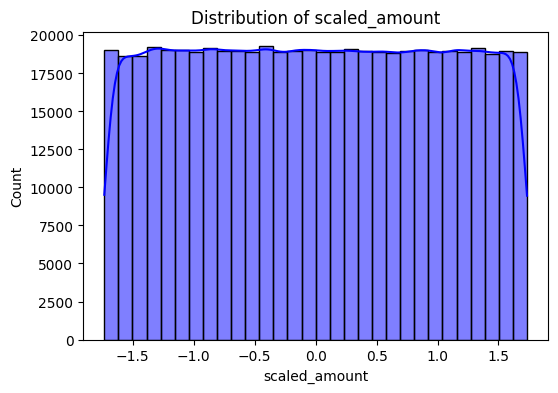

In [ ]:
# -------------------- Distribution of Features --------------------
# Plotting the distribution of selected features
features = ['V1', 'V2', 'V3', 'V4', 'scaled_amount']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

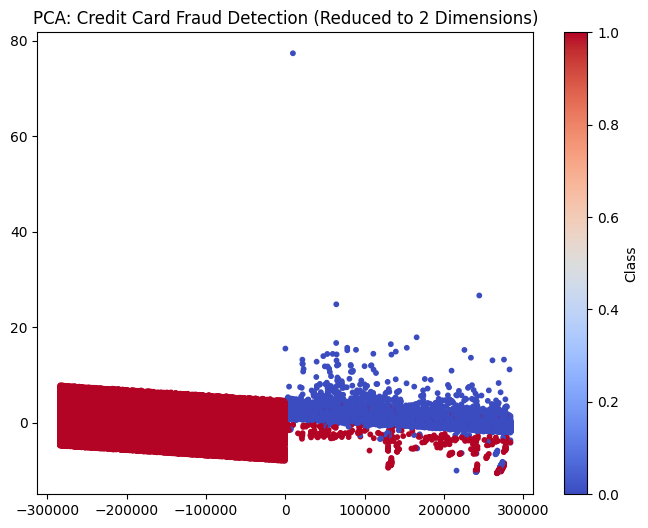

In [ ]:
# -------------------- PCA for Dimensionality Reduction --------------------
# Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=10)
plt.title('PCA: Credit Card Fraud Detection (Reduced to 2 Dimensions)')
plt.colorbar(label='Class')
plt.show()

<ipython-input-18-0c4f9bbfe1f4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette='coolwarm')


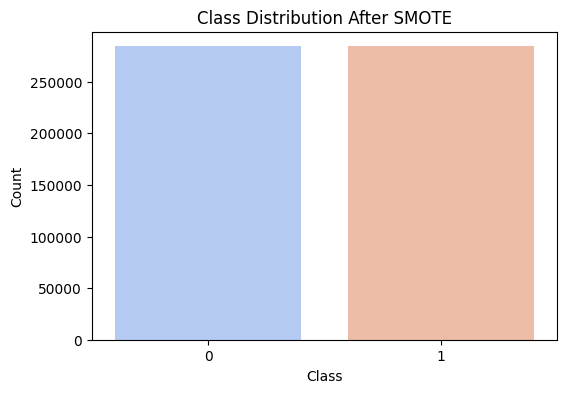

In [ ]:
# -------------------- SMOTE for Class Balancing --------------------
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Visualize class distribution after applying SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res, palette='coolwarm')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<ipython-input-19-21e1b243a4ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='V1', data=df, palette='coolwarm', split=True)


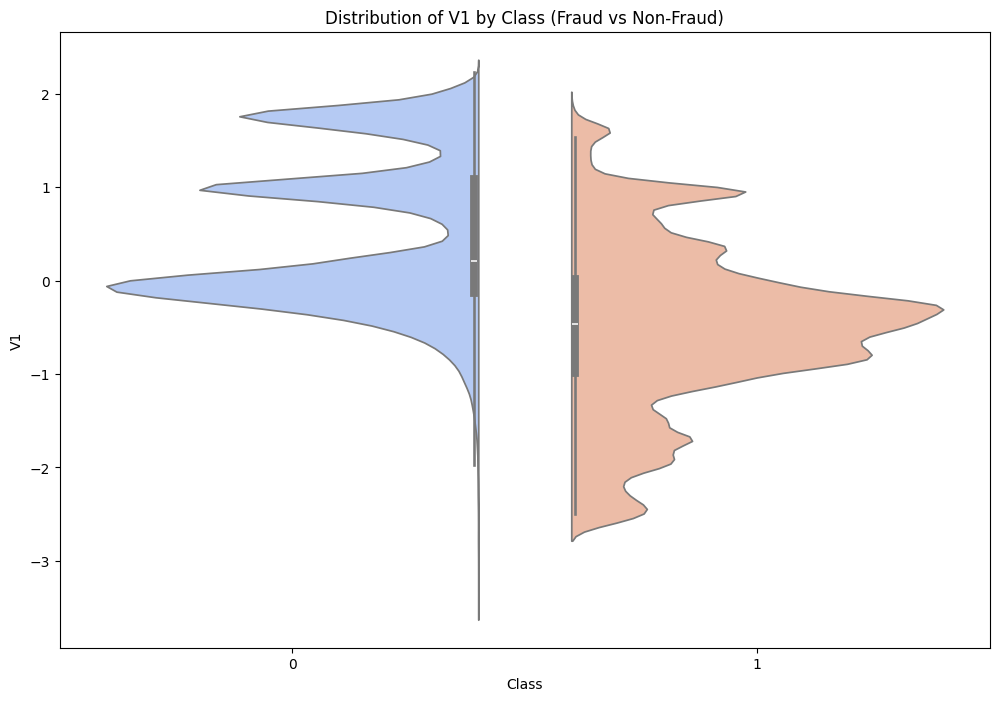

<ipython-input-19-21e1b243a4ed>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=df, palette='coolwarm', split=True)


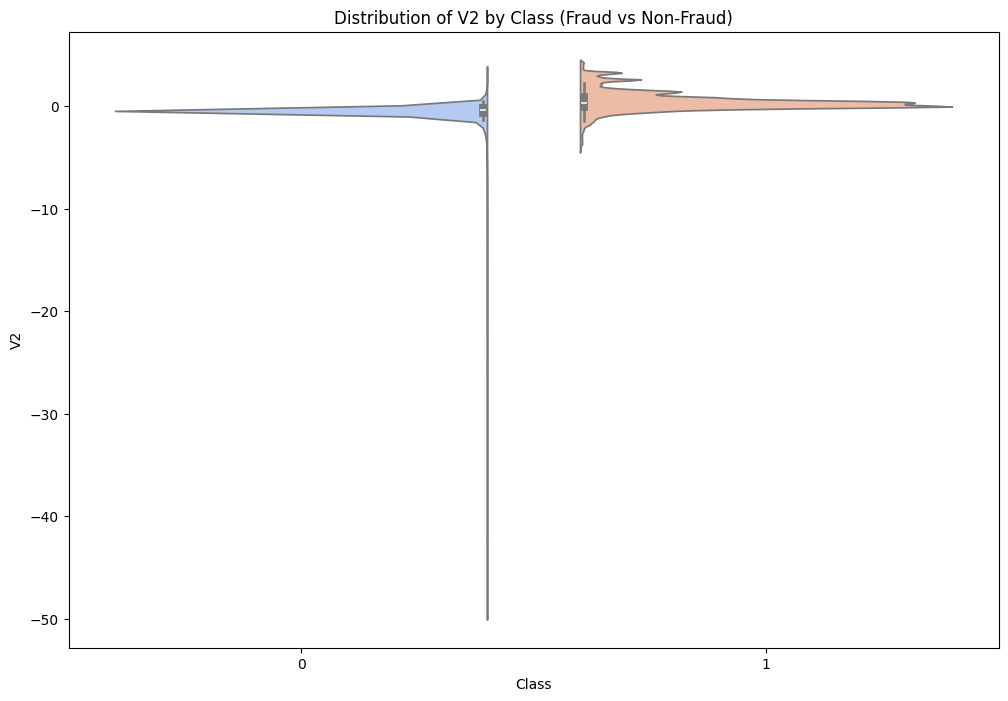

<ipython-input-19-21e1b243a4ed>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=df, palette='coolwarm', split=True)


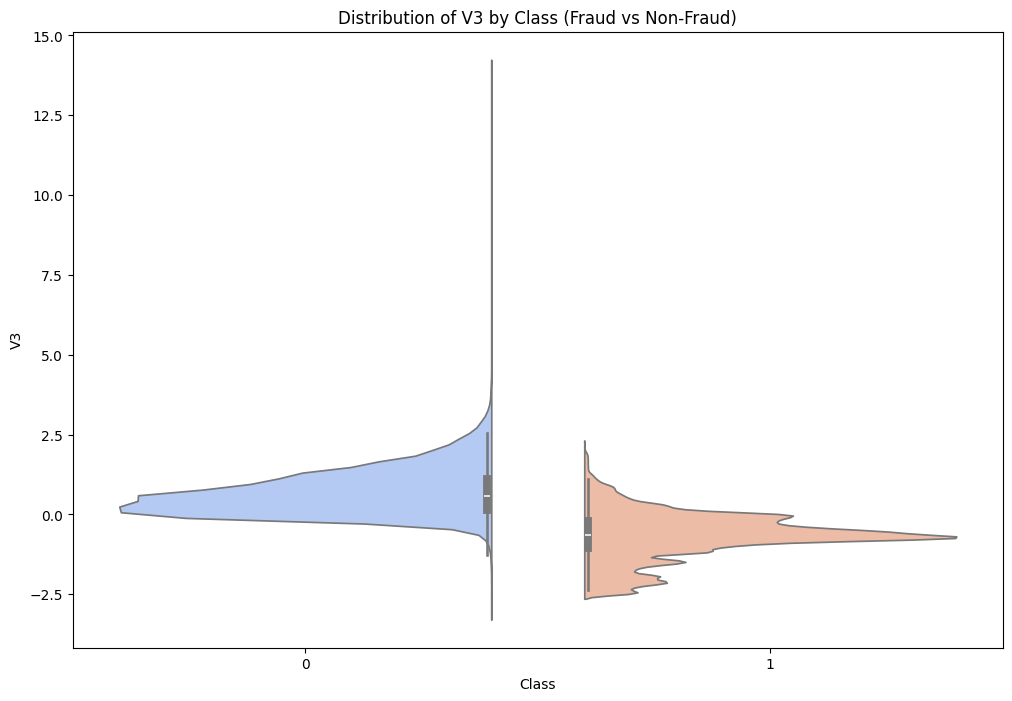

<ipython-input-19-21e1b243a4ed>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=df, palette='coolwarm', split=True)


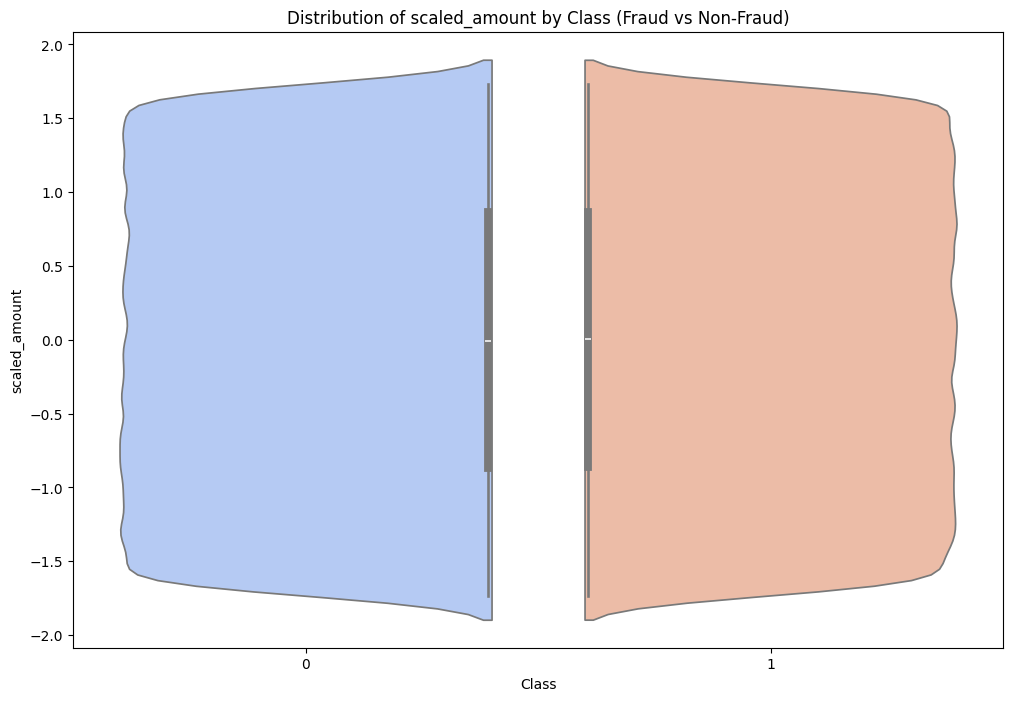

In [ ]:
# Violin plots to visualize the distribution of features in fraud and non-fraud transactions
plt.figure(figsize=(12, 8))
sns.violinplot(x='Class', y='V1', data=df, palette='coolwarm', split=True)
plt.title('Distribution of V1 by Class (Fraud vs Non-Fraud)')
plt.show()

# Repeat for more features
features = ['V2', 'V3', 'scaled_amount']
for feature in features:
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Class', y=feature, data=df, palette='coolwarm', split=True)
    plt.title(f'Distribution of {feature} by Class (Fraud vs Non-Fraud)')
    plt.show()


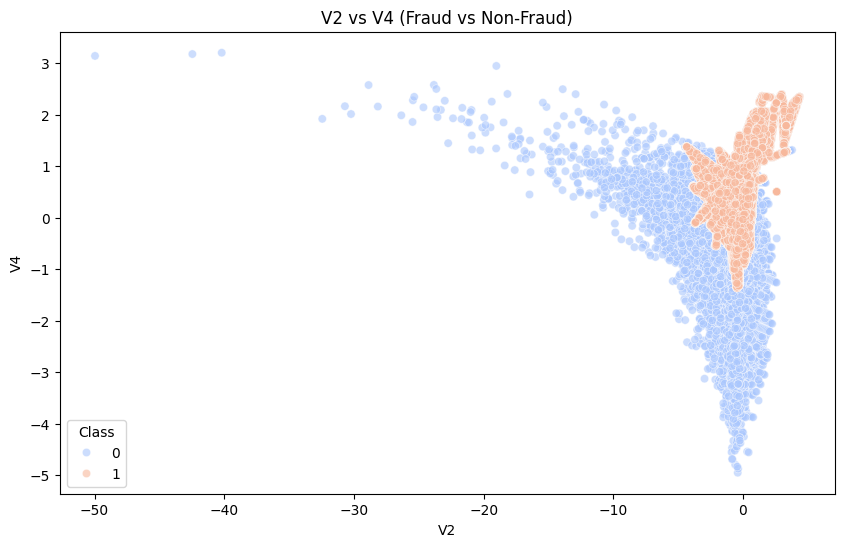

In [ ]:
# Scatter plot to visualize the relationship between two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V2', y='V4', hue='Class', data=df, palette='coolwarm', alpha=0.6)
plt.title('V2 vs V4 (Fraud vs Non-Fraud)')
plt.xlabel('V2')
plt.ylabel('V4')
plt.show()


<ipython-input-21-08f8c09032bd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V2'], label='Non-Fraud', shade=True, color='blue')
<ipython-input-21-08f8c09032bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V2'], label='Fraud', shade=True, color='red')


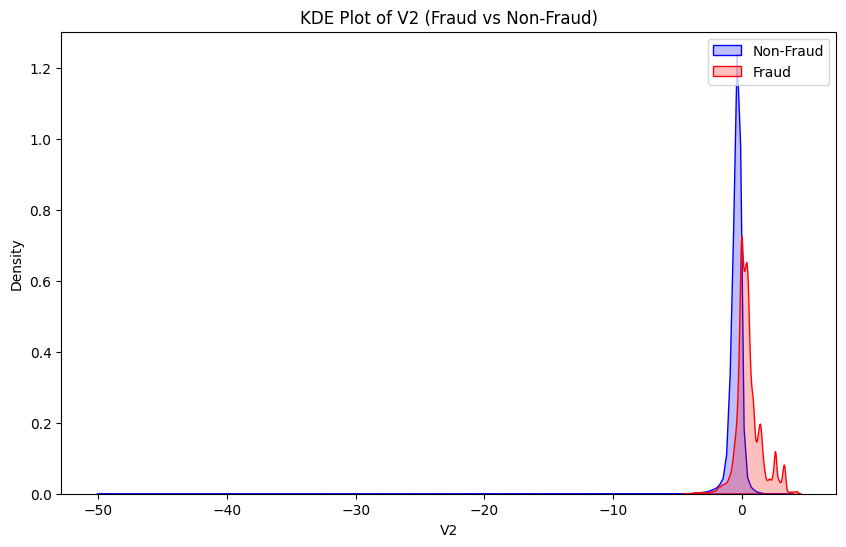

In [ ]:
# KDE plot for comparing fraud and non-fraud transactions for a feature
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 0]['V2'], label='Non-Fraud', shade=True, color='blue')
sns.kdeplot(df[df['Class'] == 1]['V2'], label='Fraud', shade=True, color='red')
plt.title('KDE Plot of V2 (Fraud vs Non-Fraud)')
plt.xlabel('V2')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-22-6b3af39f5c27>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True, color='blue')
<ipython-input-22-6b3af39f5c27>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True, color='red')


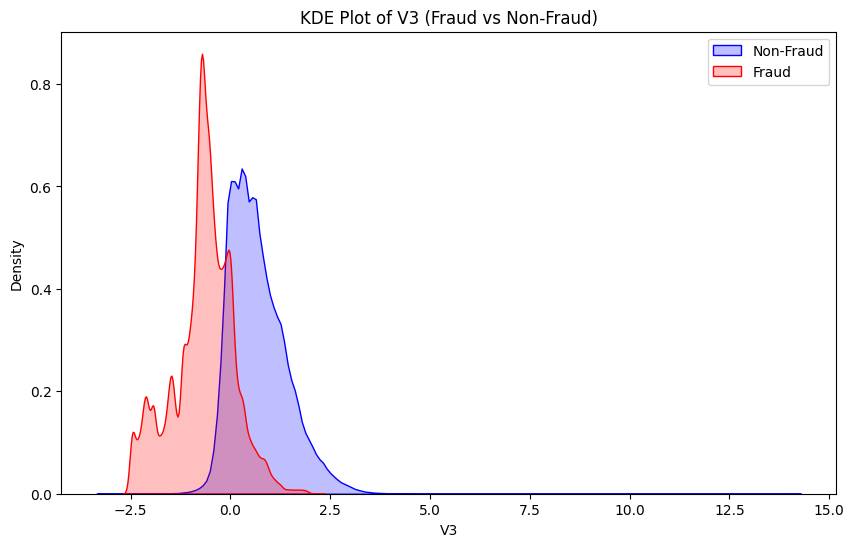

<ipython-input-22-6b3af39f5c27>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True, color='blue')
<ipython-input-22-6b3af39f5c27>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True, color='red')


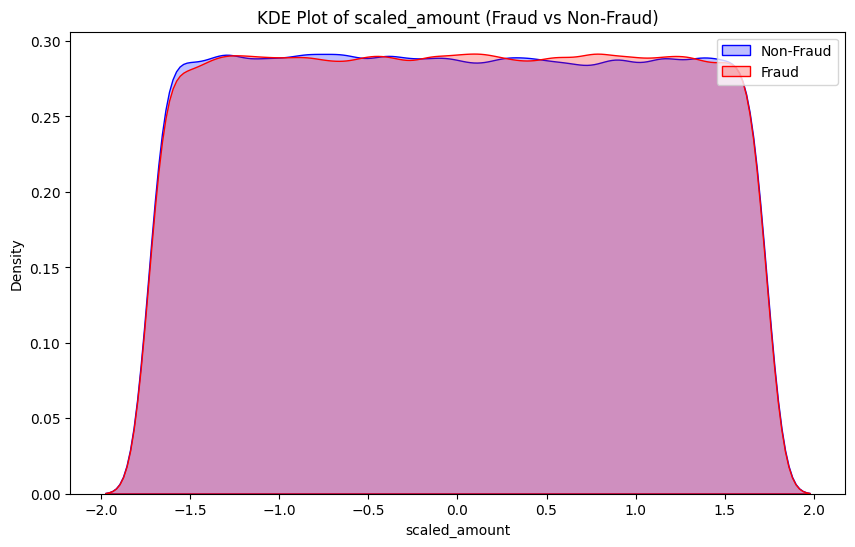

In [ ]:
# Repeat for more features
features = ['V3', 'scaled_amount']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True, color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True, color='red')
    plt.title(f'KDE Plot of {feature} (Fraud vs Non-Fraud)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

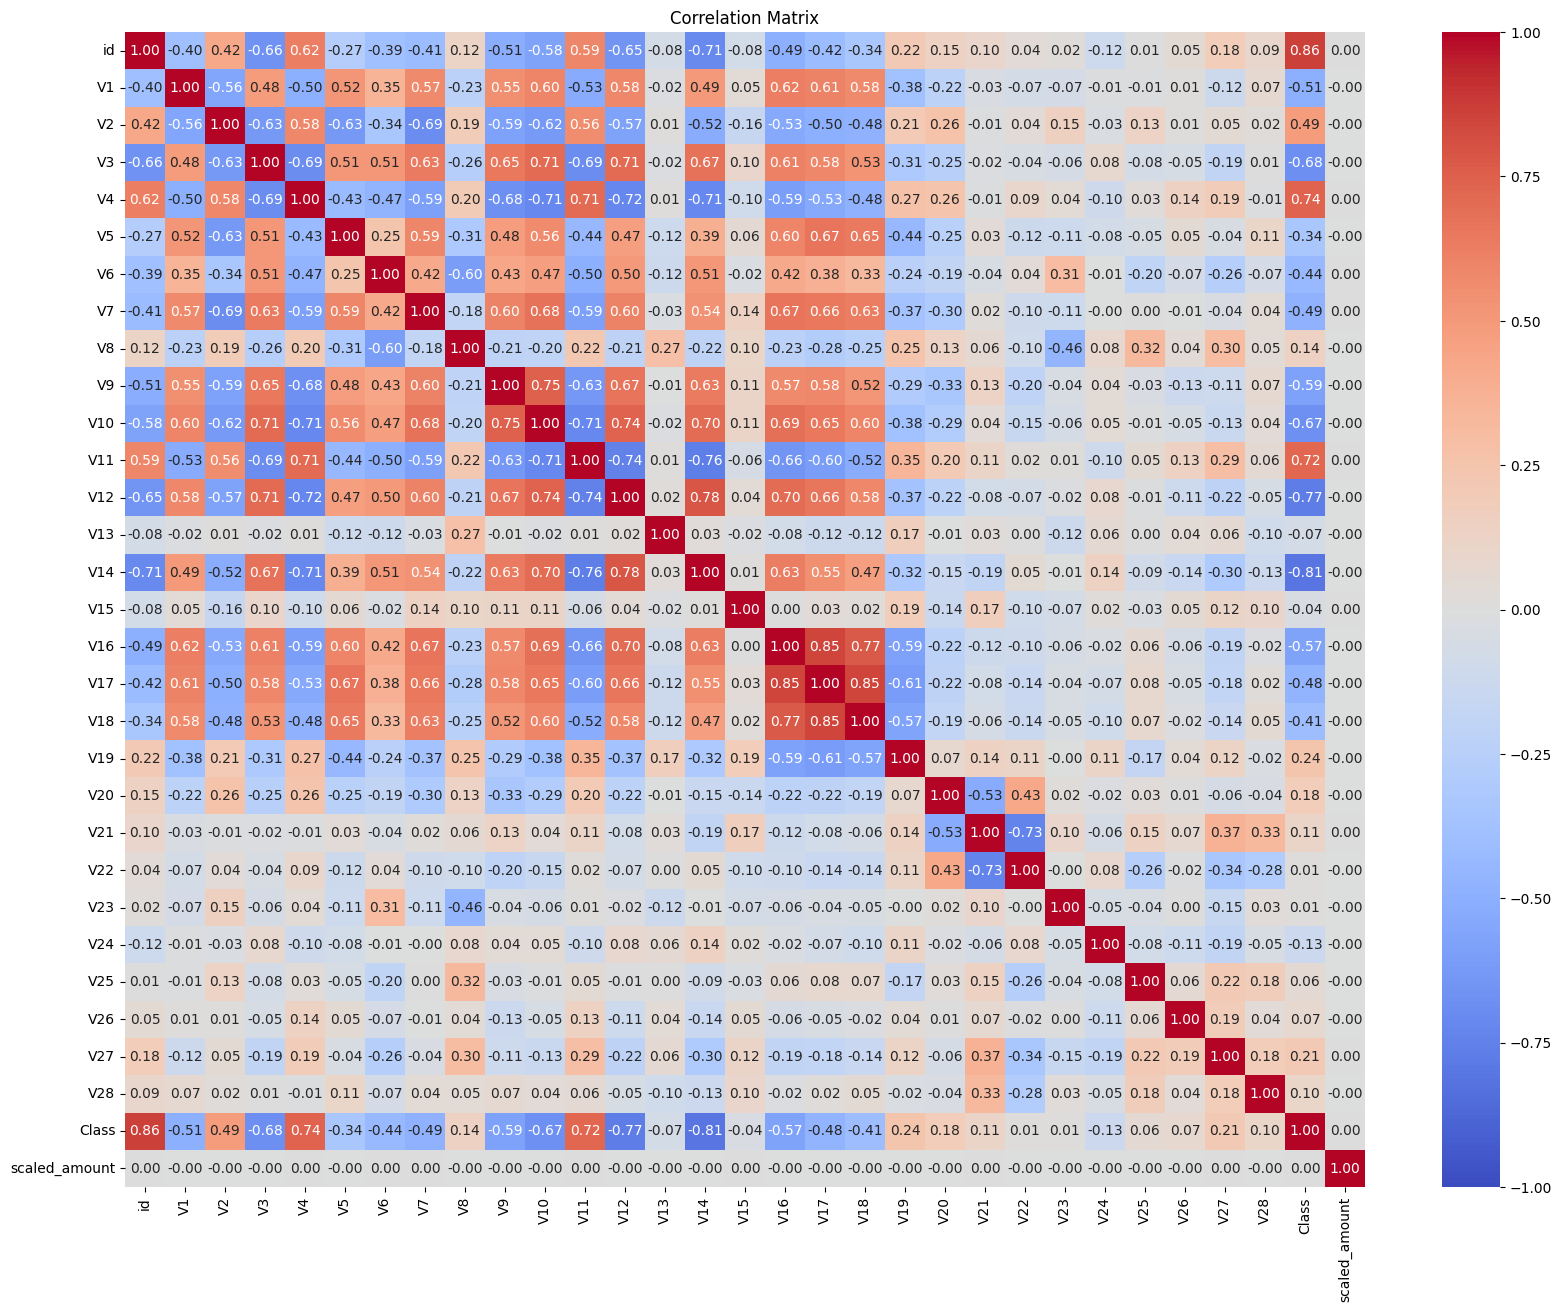

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-24-5f86a2ee2c9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


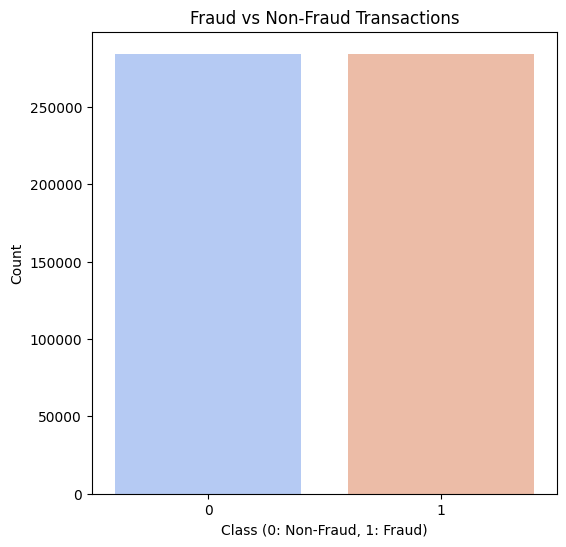

In [ ]:
# Count plot to visualize the distribution of fraud vs non-fraud transactions
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


<ipython-input-31-ca90538ab640>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='scaled_amount', data=df, palette='Set2')


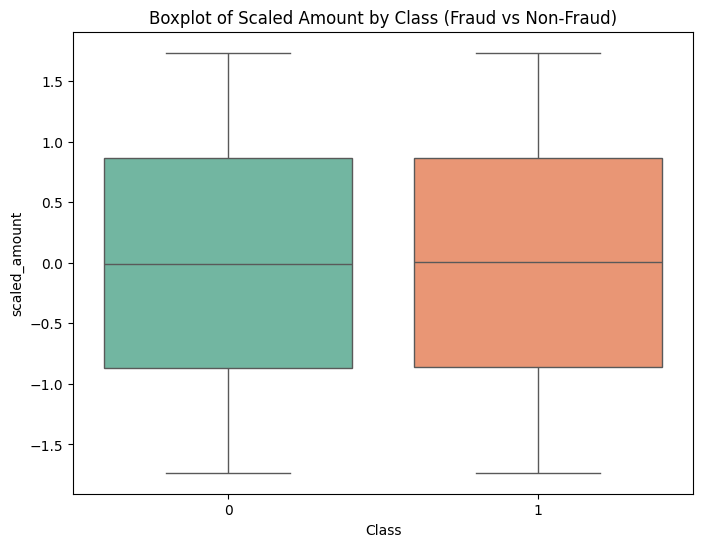

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='scaled_amount', data=df, palette='Set2')
plt.title('Boxplot of Scaled Amount by Class (Fraud vs Non-Fraud)')
plt.show()


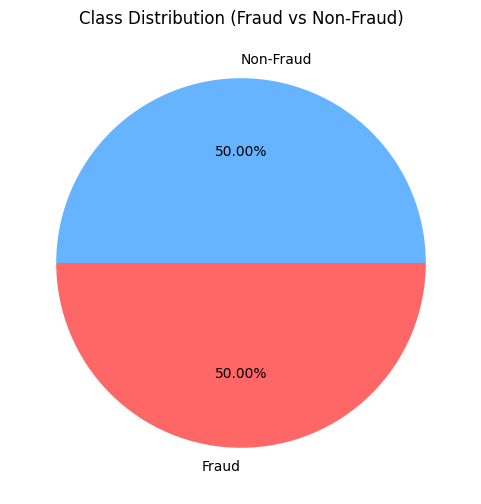

In [ ]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', colors=['#66b3ff','#ff6666'])
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()


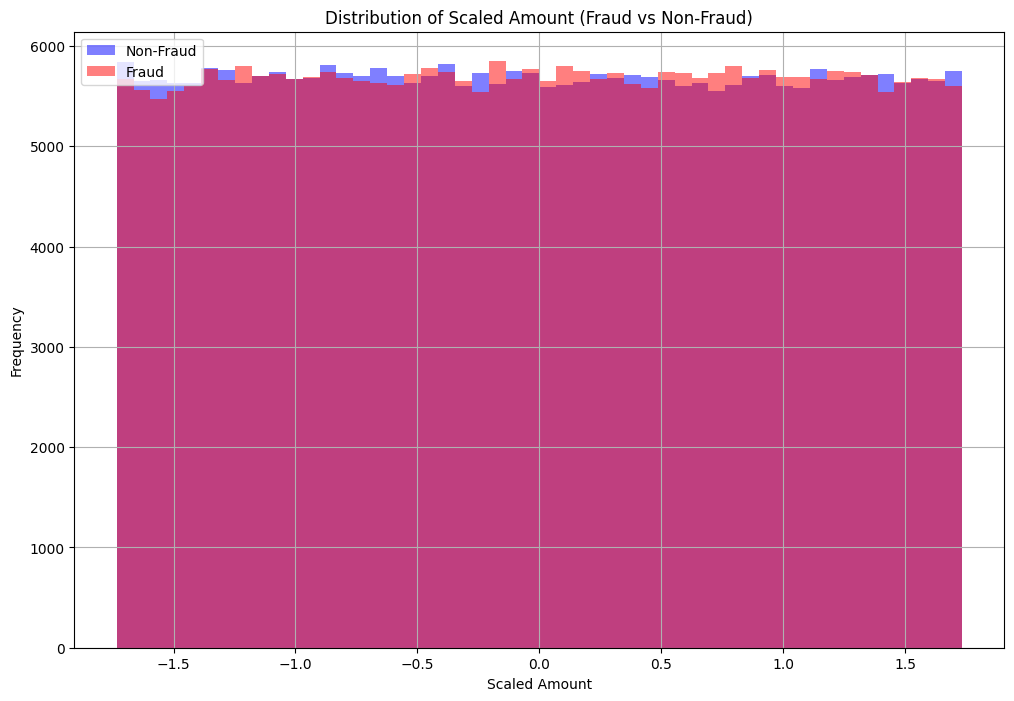

In [ ]:
plt.figure(figsize=(12,8))
df[df['Class'] == 0]['scaled_amount'].hist(alpha=0.5, color='blue', bins=50, label='Non-Fraud')
df[df['Class'] == 1]['scaled_amount'].hist(alpha=0.5, color='red', bins=50, label='Fraud')
plt.title('Distribution of Scaled Amount (Fraud vs Non-Fraud)')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


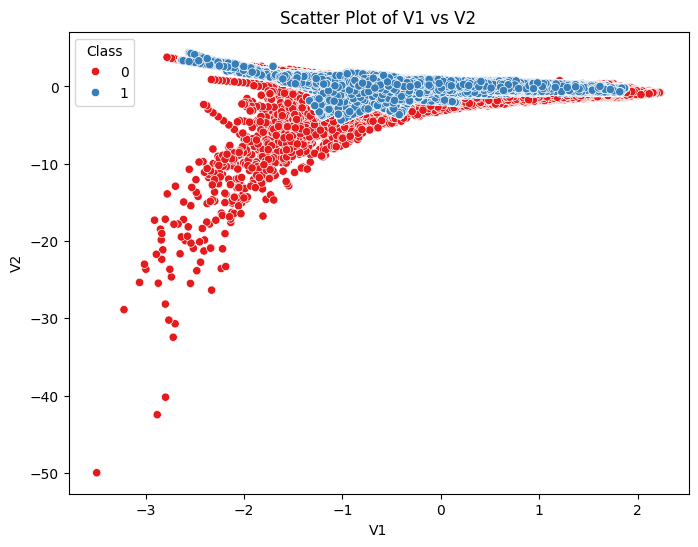

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df, palette='Set1')
plt.title('Scatter Plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()
